# **Partie 3: Analyse EDA**




In [ ]:
#importer les librairies
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [ ]:
#lecture du fichier csv 
df =pd.read_csv('features_finales.csv')

In [ ]:
df.head()

,unique_id,country,year,inflationrate,gdppercent,percapitaincome,unemploymentrate,MoyInflation,Moyemployment,MoyGdpPercent,...,diffuneployrate,diffgdppercent,situation_inflation,situation_chommage,situation_gdp,bonne_economie,oil prices,stock index,index price,exchange_rate
0,12575.0_0.11,United States of America,1980.0,0.14,0.09,12575.0,0.07,0.104833,0.050747,0.044444,...,0.019253,0.045556,0.0,0.0,1.0,0.0,21.59,NASDAQ,168.61,1.0
1,13976.0_0.14,United States of America,1981.0,0.10,0.12,13976.0,0.08,0.091500,0.052969,0.045235,...,0.027031,0.074765,0.0,0.0,1.0,0.0,31.77,NASDAQ,203.15,1.0
2,14434.0_0.13,United States of America,1982.0,0.06,0.04,14434.0,0.10,0.080194,0.057414,0.035235,...,0.042586,0.004765,1.0,0.0,1.0,1.0,28.52,NASDAQ,188.98,1.0
3,15544.0_0.11,United States of America,1983.0,0.03,0.09,15544.0,0.10,0.066861,0.060868,0.051111,...,0.039132,0.038889,1.0,0.0,1.0,1.0,26.19,NASDAQ,285.43,1.0
4,17121.0_0.12,United States of America,1984.0,0.04,0.11,17121.0,0.08,0.059083,0.058646,0.060000,...,0.021354,0.050000,1.0,0.0,1.0,1.0,25.88,NASDAQ,248.89,1.0


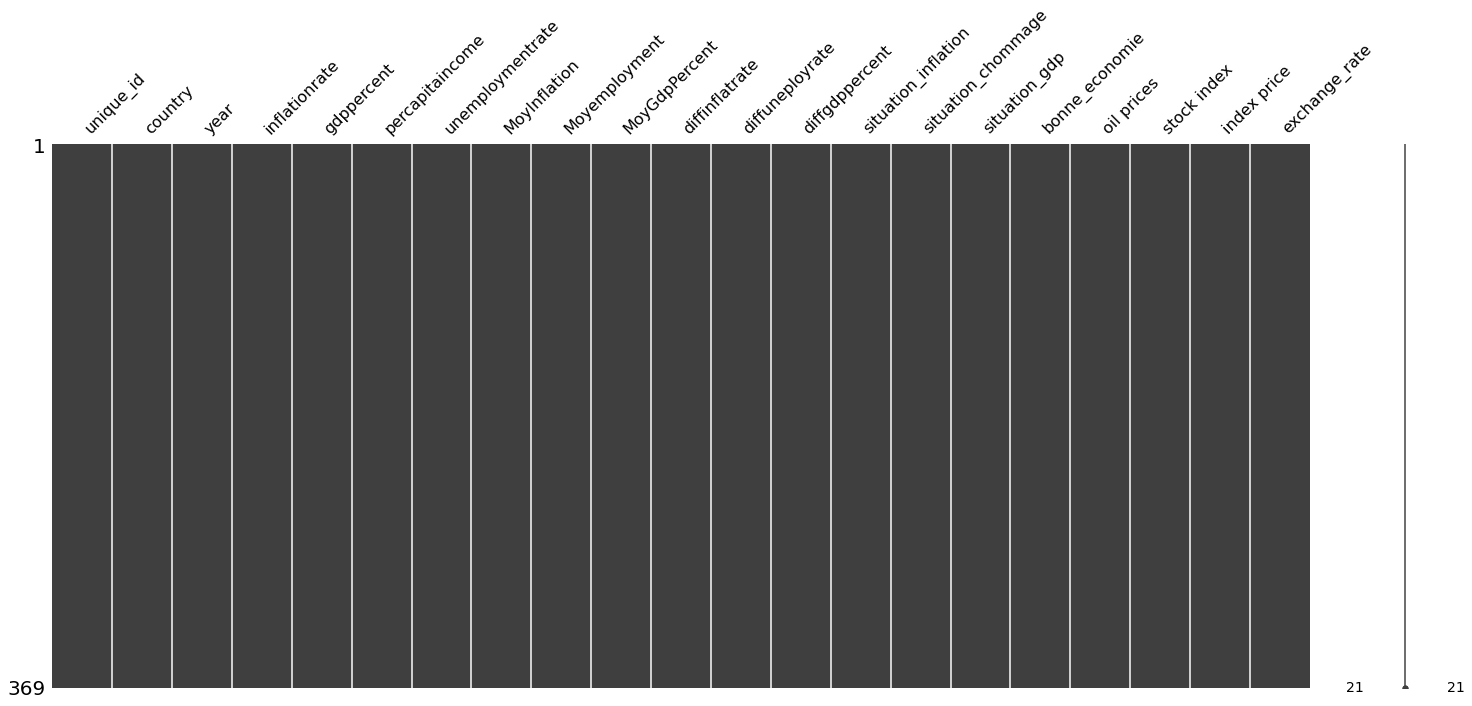

In [ ]:
# pour avoir un visuel que y a plus de vide ou null 
msno.matrix(df)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff832e49990>,
      dtype=object)

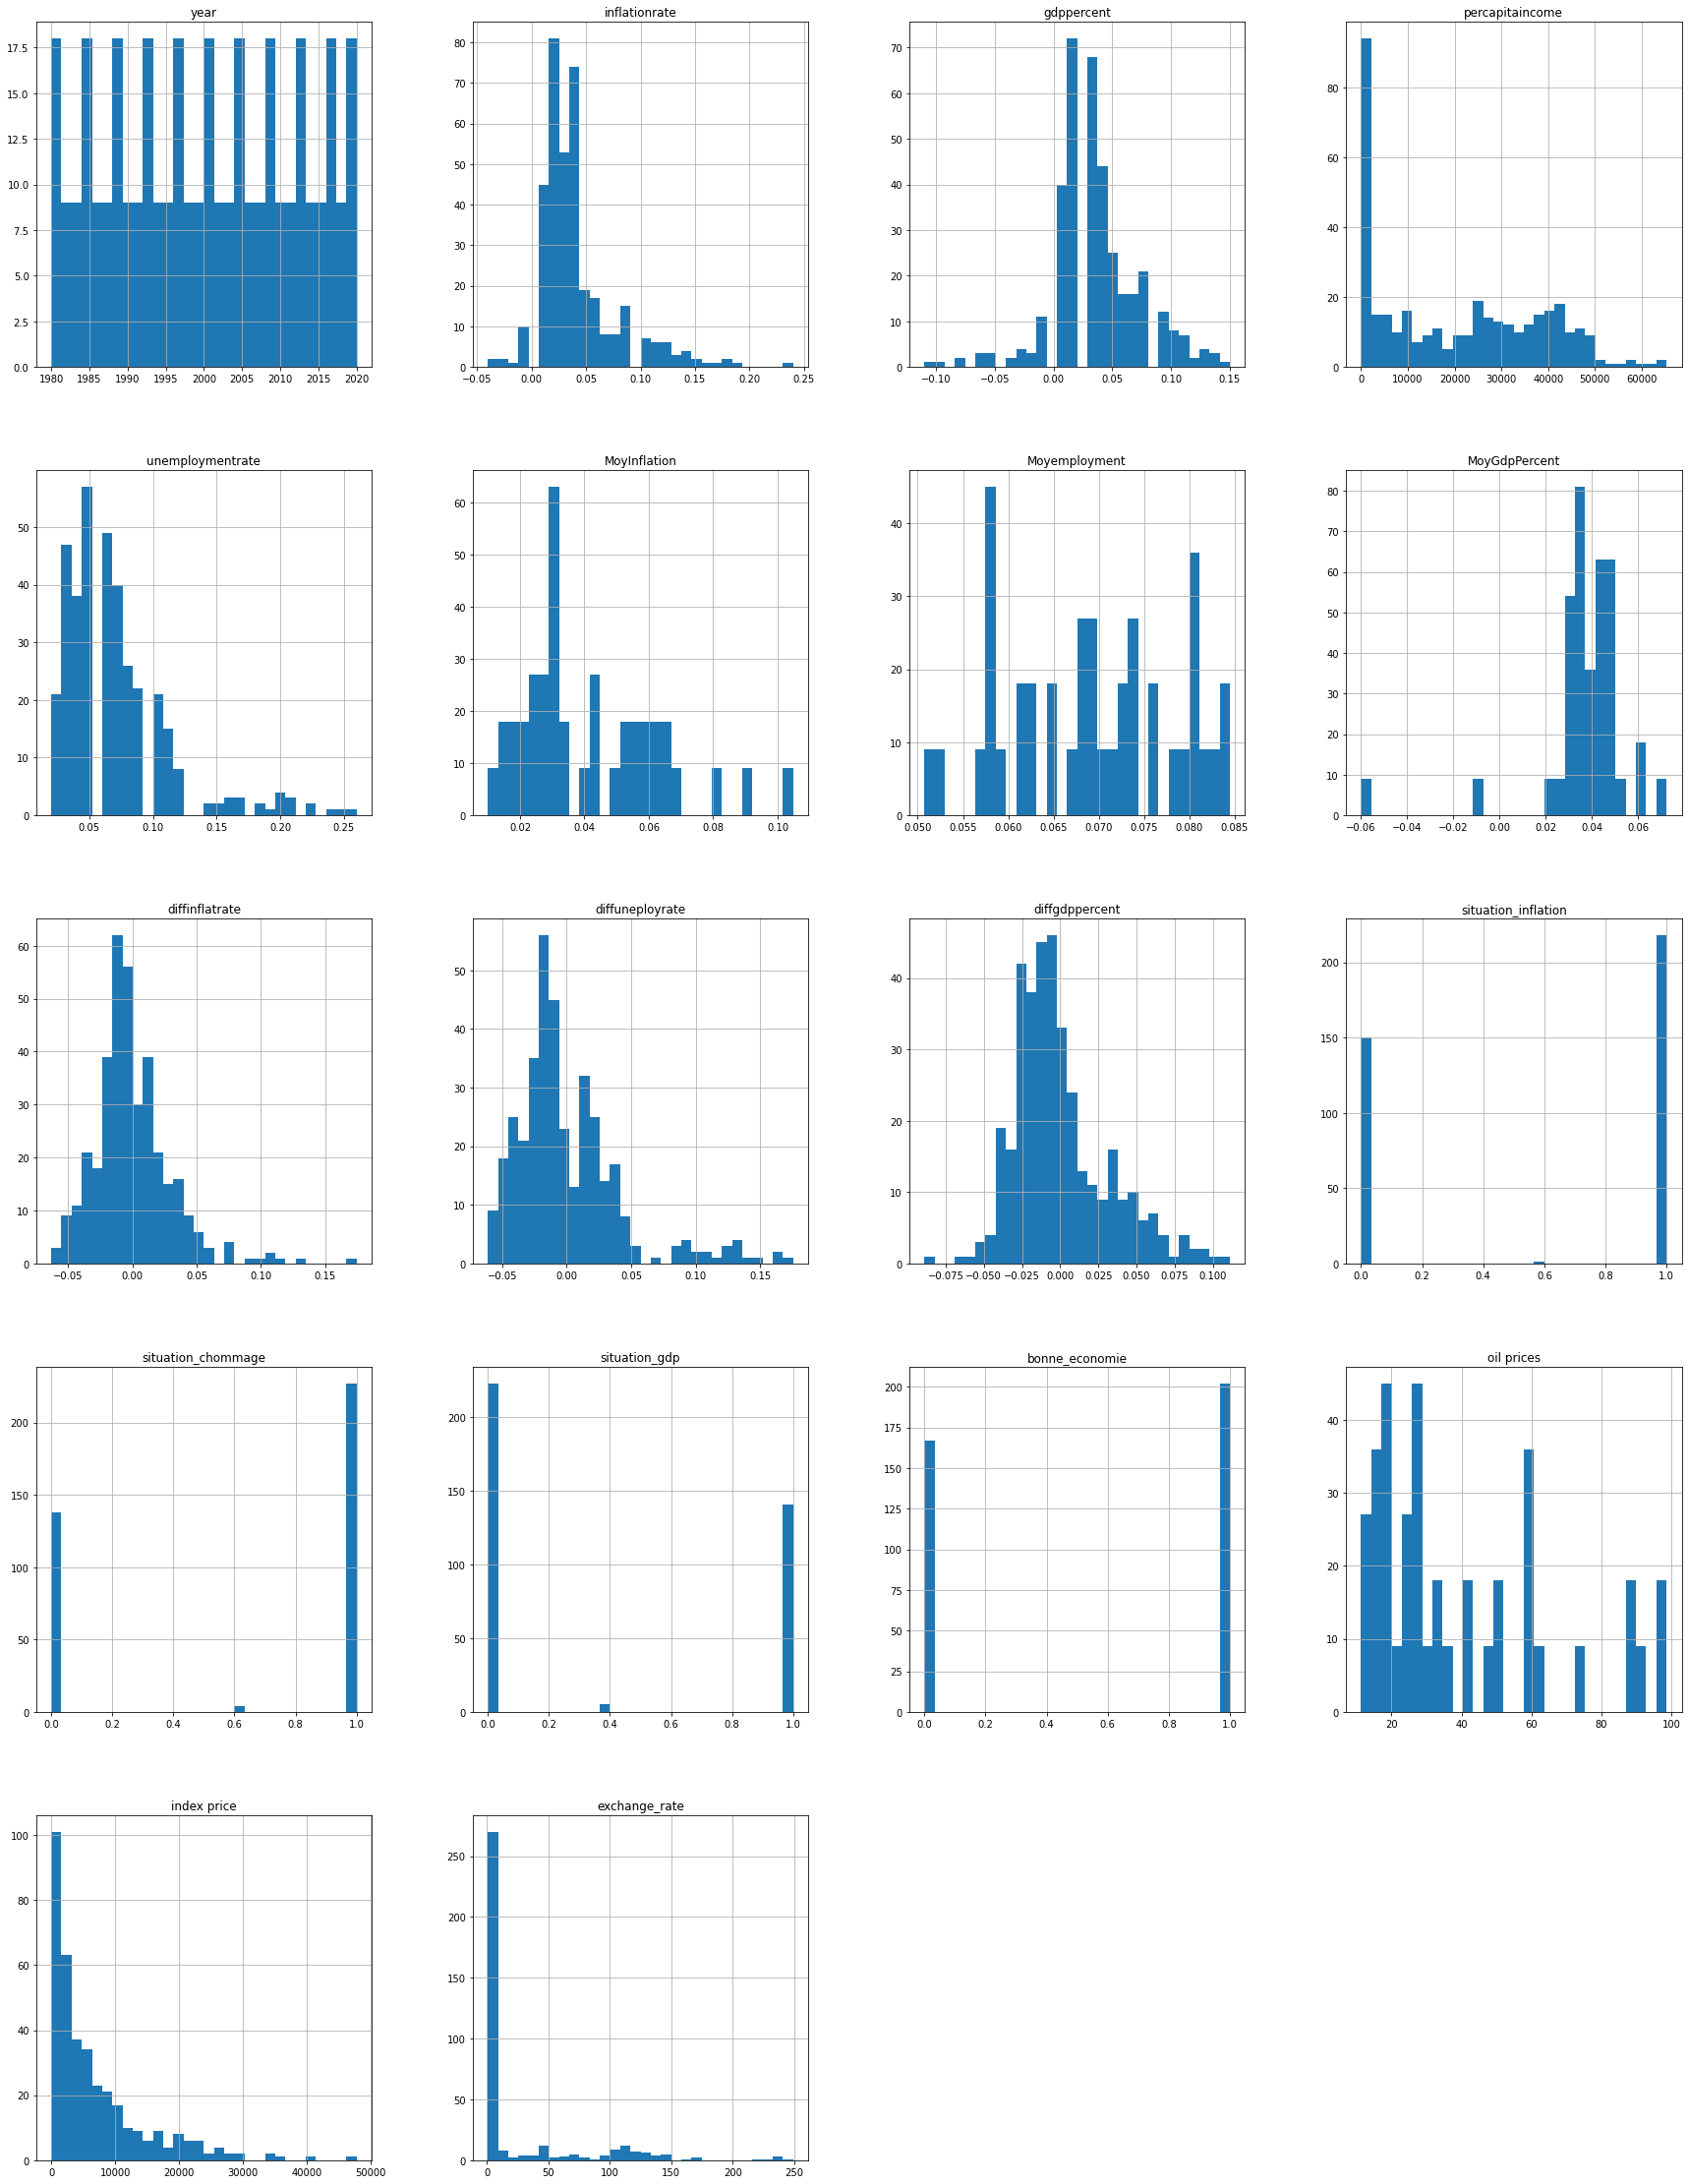

In [ ]:
#pour avoir une idée génerale des visuels graphiques
df.hist(figsize=(30, 40), bins=30)

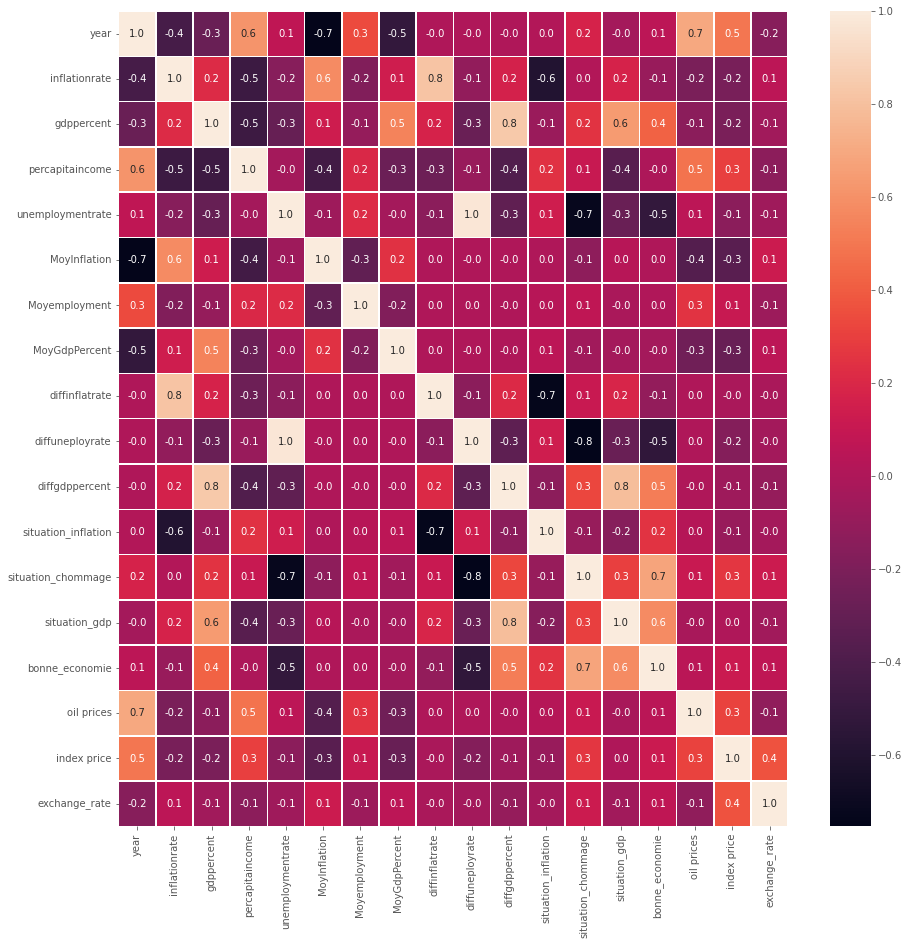

In [ ]:
#Heatmap pour avoir une vue sur les correlations entre les differentes features
f,ax = plt.subplots(figsize=(15, 15))

sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

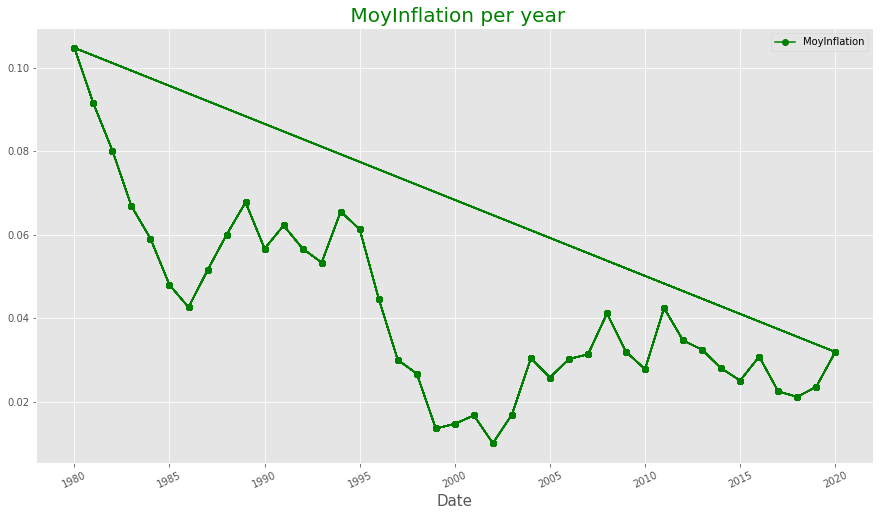

In [ ]:
#Moyinflation per year
date=df['year']
inflation=df['MoyInflation']

x=list(date)
y=list(inflation)
plt.style.use('ggplot')
plt.figure(figsize=(15,8))
plt.plot(x, y, color = 'g', linestyle = 'solid', marker = 'o', label = "MoyInflation")

plt.xlabel('Date',fontsize=15)
plt.xticks(rotation = 25)
plt.title(' MoyInflation per year',fontsize=20,color='green')
plt.legend()
plt.show()

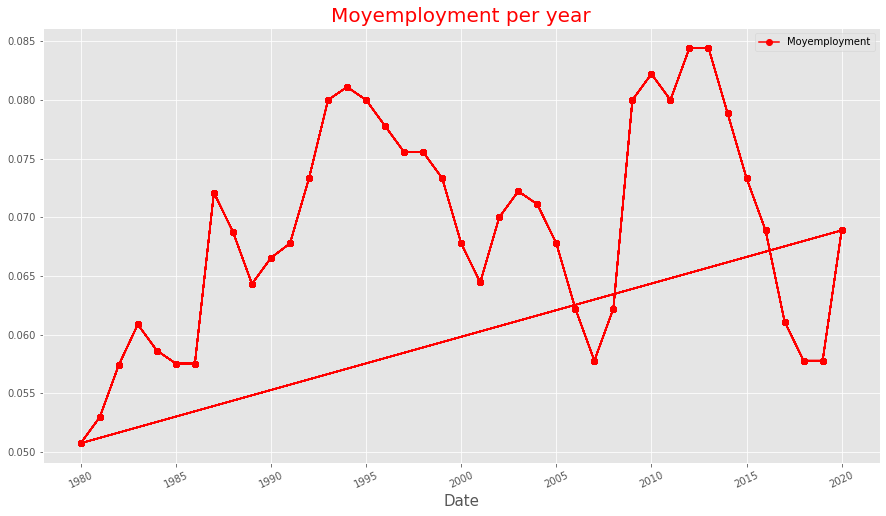

In [ ]:
#Moyemployment per year
date=df['year']
inflation=df['Moyemployment']

x=list(date)
y=list(inflation)
plt.style.use('seaborn-bright')
plt.figure(figsize=(15,8))

plt.plot(x, y, color = 'r', linestyle = 'solid', marker = 'o', label = "Moyemployment")

plt.xlabel('Date',fontsize=15)
plt.xticks(rotation = 25)
plt.title('Moyemployment per year',fontsize=20,color='red')
plt.legend()

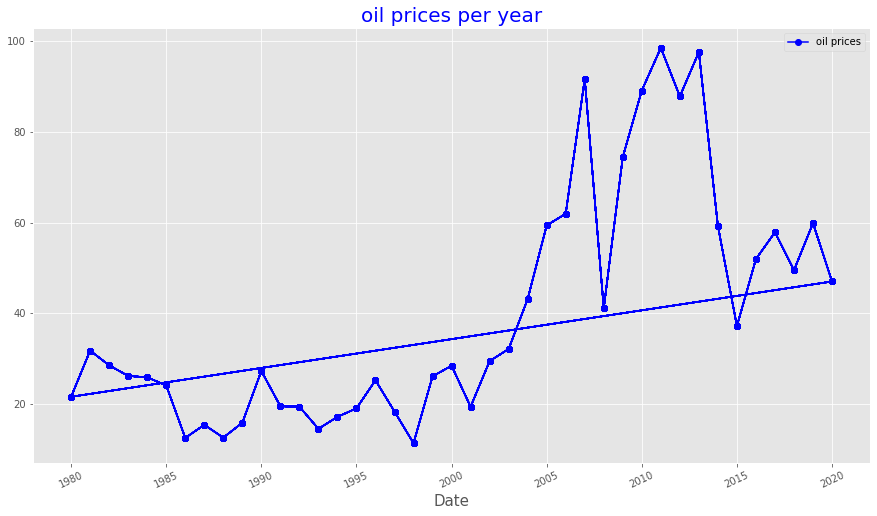

In [ ]:
#evolution des prix du petrole
date=df['year']
inflation=df['oil prices']

x=list(date)
y=list(inflation)
plt.figure(figsize=(15,8))
plt.style.use('ggplot')
plt.plot(x, y, color = 'b', linestyle = 'solid', marker = 'o', label = "oil prices")

plt.xlabel('Date',fontsize=15)
plt.xticks(rotation = 25)
plt.title('oil prices per year',fontsize=20,color='blue')
plt.legend()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


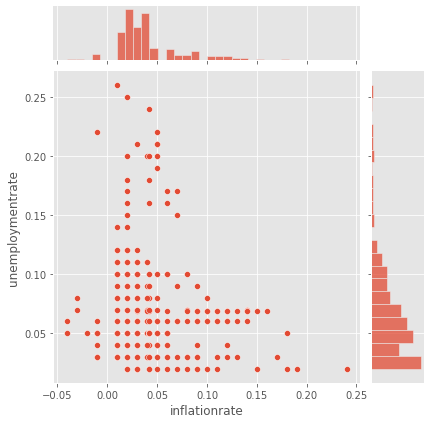

In [ ]:
# voir la correlation entre le taux de chomage et le taux d'inflation
sns.jointplot(df['inflationrate'], df['unemploymentrate'])

In [ ]:
#determiner la situation economique de chaque pays
USA = df[:41].bonne_economie                        
UK = df[41:82].bonne_economie  
INDIA = df[82:123].bonne_economie    
JAPAN = df[123:164].bonne_economie  
HONG_KONG = df[164:205].bonne_economie  
CHINA = df[205:246].bonne_economie  
GERMANY = df[246:287].bonne_economie  
FRANCE = df[287:328].bonne_economie  
SPAIN= df[328:369].bonne_economie  

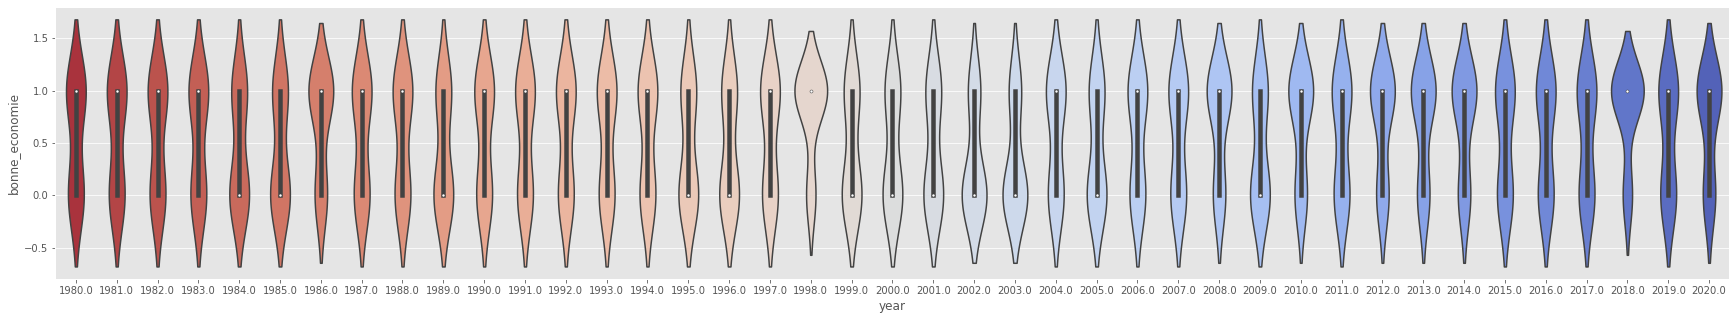

In [ ]:
#voir l'économie de chaque année
fig,ax =plt.subplots(figsize=(30,5))
ax = sns.violinplot(x="year", y="bonne_economie", data=df,palette="coolwarm_r")

**#bonne et mauvaise economie par pays sur 40 ans**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la USA avait une Bonnes économies:  30 fois
entre 1980 et 2020 la USA avait une Mauvaise économies:  11 fois


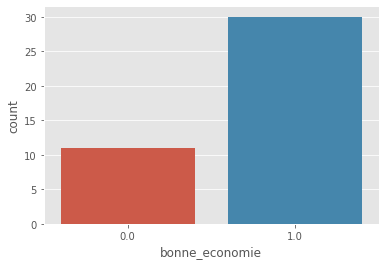

In [ ]:
#bonne et mauvaise economie par pays et par année
ax = sns.countplot(USA,label="Nbr de fois")
B,M = USA.value_counts()
print('entre 1980 et 2020 la USA avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la USA avait une Mauvaise économies: ',M, 'fois')


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la USA avait une Bonnes économies:  23 fois
entre 1980 et 2020 la USA avait une Mauvaise économies:  18 fois


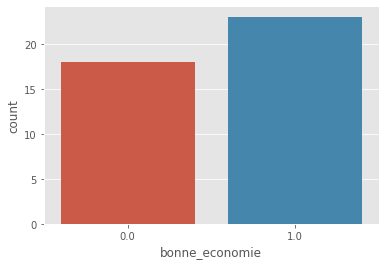

In [ ]:
ax = sns.countplot(UK,label="Count")
B,M = UK.value_counts()
print('entre 1980 et 2020 la USA avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la USA avait une Mauvaise économies: ',M, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la INDIA avait une Bonnes économies:  33 fois
entre 1980 et 2020 la INDIA avait une Mauvaise économies:  8 fois


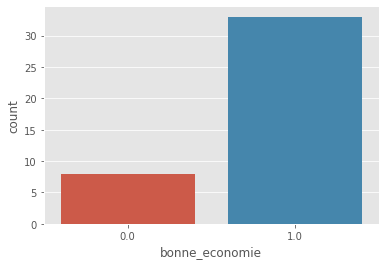

In [ ]:
ax = sns.countplot(INDIA,label="Count")
B,M = INDIA.value_counts()
print('entre 1980 et 2020 la INDIA avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la INDIA avait une Mauvaise économies: ',M, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la JAPAN avait une Bonnes économies:  31 fois
entre 1980 et 2020 la JAPAN avait une Mauvaise économies:  10 fois


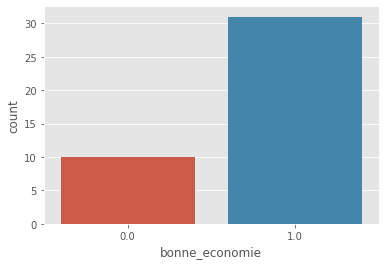

In [ ]:
ax = sns.countplot(JAPAN,label="Count")
B,M = JAPAN.value_counts()
print('entre 1980 et 2020 la JAPAN avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la JAPAN avait une Mauvaise économies: ',M, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la HONG_KONG avait une Bonnes économies:  25 fois
entre 1980 et 2020 la HONG_KONG avait une Mauvaise économies:  16 fois


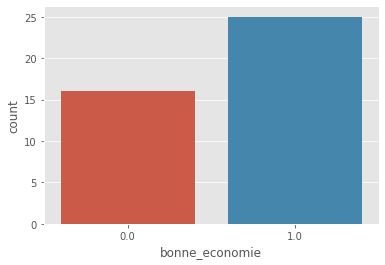

In [ ]:
ax = sns.countplot(HONG_KONG,label="Count")
B,M = HONG_KONG.value_counts()
print('entre 1980 et 2020 la HONG_KONG avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la HONG_KONG avait une Mauvaise économies: ',M, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la CHINA avait une Bonnes économies:  40 fois
entre 1980 et 2020 la CHINA avait une Mauvaise économies:  1 fois


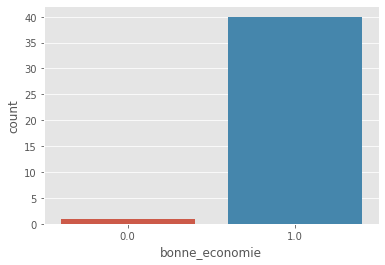

In [ ]:
ax = sns.countplot(CHINA,label="Count")
B,M = CHINA.value_counts()
print('entre 1980 et 2020 la CHINA avait une Bonnes économies: ',B,'fois')
print('entre 1980 et 2020 la CHINA avait une Mauvaise économies: ',M, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la GERMANY avait une Bonnes économies:  15 fois
entre 1980 et 2020 la GERMANY avait une Mauvaise économies:  26 fois


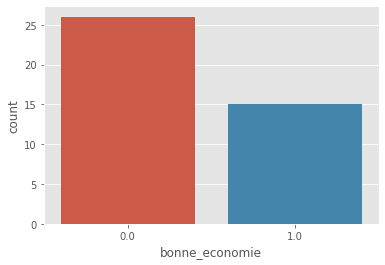

In [ ]:
ax = sns.countplot(GERMANY,label="Count")
B,M = GERMANY.value_counts()
print('entre 1980 et 2020 la GERMANY avait une Bonnes économies: ',M,'fois')
print('entre 1980 et 2020 la GERMANY avait une Mauvaise économies: ',B, 'fois')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


entre 1980 et 2020 la FRANCE avait une Bonnes économies:  3 fois
entre 1980 et 2020 la FRANCE avait une Mauvaise économies:  38 fois


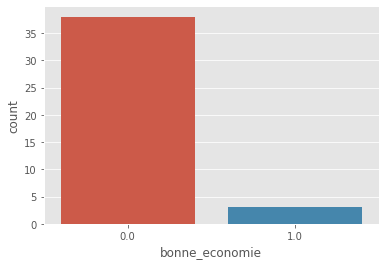

In [ ]:
ax = sns.countplot(FRANCE,label="Count")
B,M = FRANCE.value_counts()
print('entre 1980 et 2020 la FRANCE avait une Bonnes économies: ',M,'fois')
print('entre 1980 et 2020 la FRANCE avait une Mauvaise économies: ',B, 'fois')

entre 1980 et 2020 la SPAIN avait une Bonnes économies:  2 fois
entre 1980 et 2020 la SPAIN avait une Mauvaise économies:  39 fois


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


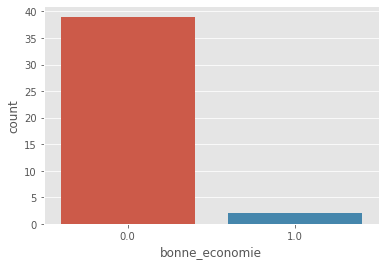

In [ ]:
ax = sns.countplot(SPAIN,label="Count")
B,M = SPAIN.value_counts()
print('entre 1980 et 2020 la SPAIN avait une Bonnes économies: ',M,'fois')
print('entre 1980 et 2020 la SPAIN avait une Mauvaise économies: ',B, 'fois')